# CPSC380: 2_numpy_3_functions

In this notebook, you will learn:
 - Vectorization
 - Array mathematics: unary functions, binary functions
 - Statistics methods
 - Normalization
 - Example: Average height of US presidents
 
Read more: 
 - textbook (https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) and
 - [Numpy website] (https://numpy.org/).

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

In [1]:
import numpy as np

## 1. Vectorization

You deal with very large datasets very frequently. Hence, a non-computationally-optimal function can become a huge bottleneck in your algorithm and can result in a model that takes ages to run. To make sure that your code is  computationally efficient, you will use vectorization. For example, try to tell the difference between the following implementations of the dot/elementwise product.

In [2]:
x = range(1000000)
%timeit -r 1 -n 5 sum(x)

np_x = np.arange(1000000)
%timeit -r 1 -n 5 np.sum(np_x)

44.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
519 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [27]:
import time

x1 = range(1000000)
x2 = range(1000000)

### CLASSIC DOT PRODUCT OF VECTORS IMPLEMENTATION ###
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
toc = time.process_time()
print ("dot time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]
toc = time.process_time()
print ("elementwise multiplication time = " + str(1000*(toc - tic)) + "ms")

dot time = 437.5ms
elementwise multiplication time = 515.625ms


In [28]:
x1 = np.arange(1000000)
x2 = np.arange(1000000)
### VECTORIZED DOT PRODUCT OF VECTORS ###
tic = time.process_time()
dot = np.dot(x1,x2)
toc = time.process_time()
print ("dot  time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED ELEMENTWISE MULTIPLICATION ###
tic = time.process_time()
mul = np.multiply(x1,x2)
toc = time.process_time()
print ("elementwise multiplication time = " + str(1000*(toc - tic)) + "ms")


dot  time = 0.0ms
elementwise multiplication time = 0.0ms


**Conclusion**: the vectorized implementation is much cleaner and more efficient. 

## 2. Array mathematics

### 2.1 Unary Universal Functions

In [5]:
import numpy as np

# example of np.exp
x = np.array(1)
print('X dim: ', x.ndim, '\n\n', np.exp(x)) # result is (exp(1)) e^1

X dim:  0 

 2.718281828459045


If $ x = (x_1, x_2, ..., x_n)$ is a row vector then $np.exp(x)$ will apply the exponential function to every element of x. The output will thus be: $np.exp(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})$

In [6]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3])
print('X dim: ', x.ndim, '\n\n', np.exp(x)) # result is (exp(1), exp(2), exp(3))

X dim:  1 

 [ 2.71828183  7.3890561  20.08553692]


In [7]:
# example of np.exp
x = np.array([[1, 2, 3],[4, 5, 6]])
print('X dim: ', x.ndim, '\n\n', np.exp(x)) # result is ([exp(1), exp(2), exp(3)][exp(4), exp(5), exp(6)])

X dim:  2 

 [[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]


Furthermore, if x is a vector, then a Python operation such as $s = x + 3$ or $s = \frac{1}{x}$ will output s as a vector of the same size as x.

In [8]:
print(x)
print (x + 3)
print (1/x)

[[1 2 3]
 [4 5 6]]
[[4 5 6]
 [7 8 9]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]


In [9]:
a = np.array([1.1, 4.5, 9.9], float)

print(np.square(a))# [ 1.21 20.25 98.01]
print(np.sqrt(a))  # [1.04880885 2.12132034 3.14642654]
print(np.sign(a))  # [1. 1. 1.]

print(np.exp(a)) 
print(np.log(a))   # [0.09531018 1.5040774  2.29253476]
print(np.log2(a))  # [0.13750352 2.169925   3.30742853]
print(np.log10(a)) # [0.04139269 0.65321251 0.99563519]

print(np.floor(a)) # array([ 1., 4., 9.]) 
print(np.ceil(a))  # array([ 2., 5., 10.]) 
print(np.rint(a))   # array([ 1., 2., 2.])

[ 1.21 20.25 98.01]
[1.04880885 2.12132034 3.14642654]
[1. 1. 1.]
[3.00416602e+00 9.00171313e+01 1.99303704e+04]
[0.09531018 1.5040774  2.29253476]
[0.13750352 2.169925   3.30742853]
[0.04139269 0.65321251 0.99563519]
[1. 4. 9.]
[ 2.  5. 10.]
[ 1.  4. 10.]


### 2.2 Binary Universal Functions

In [10]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print (x + y)
print (np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [11]:
# Elementwise difference; both produce the array
print (x - y)
print (np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [12]:
# Elementwise product; both produce the array
print(x, "\n")
print(y, "\n")
print (x * y, "\n")
print (np.multiply(x, y))

[[1. 2.]
 [3. 4.]] 

[[5. 6.]
 [7. 8.]] 

[[ 5. 12.]
 [21. 32.]] 

[[ 5. 12.]
 [21. 32.]]


In [13]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print (x / y)
print (np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


**Note**: 
- `*` is **elementwise multiplication**, not matrix multiplication. 
- Use the **dot** function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices.

**Matrix Multiplication**

In [14]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print (v.dot(w))       # 9*11+10*12=219
print (np.dot(v, w))

219
219


In [15]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print ('Shapes: ', x.shape, v.shape, "=>", x.dot(v))
print ('Shapes: ', x.shape, v.shape, "=>", np.dot(x, v))

Shapes:  (2, 2) (2,) => [29 67]
Shapes:  (2, 2) (2,) => [29 67]


In [16]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print ('Shapes: ', x.shape, y.shape, "=>\n", x.dot(y))
print ('Shapes: ', x.shape, y.shape, "=>\n", np.dot(x, y))

Shapes:  (2, 2) (2, 2) =>
 [[19 22]
 [43 50]]
Shapes:  (2, 2) (2, 2) =>
 [[19 22]
 [43 50]]


In [17]:
# inner, outer, and cross products of matrices and vectors. 
# For vectors, the inner product is equivalent to the dot product
a = np.array([1, 4, 0], float) 
b = np.array([2, 2, 1], float)

print(np.outer(a, b), '\n') # (n, 1) * (1, n)
print(np.inner(a, b),'\n') # (1, n) * (n, 1)
print(np.cross(a, b),'\n') # ???

[[2. 2. 1.]
 [8. 8. 4.]
 [0. 0. 0.]] 

10.0 

[ 4. -1. -6.] 



Other matrix operations:
 - Transpose
 - Reshape

In [18]:
v = np.array([[1,2,3]])
print (v, v.shape, "\n") 
print (v.T, v.T.shape, "\n")

x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]])
print (x, x.shape, "\n")
print (x.T, x.T.shape)

[[1 2 3]] (1, 3) 

[[1]
 [2]
 [3]] (3, 1) 

[[1 2 3 4]
 [5 6 7 8]] (2, 4) 

[[1 5]
 [2 6]
 [3 7]
 [4 8]] (4, 2)


In [19]:
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]])

print (x, x.shape, "\n")

# rank2 (4,2)
print (np.reshape(x, (4,2)), np.reshape(x, (4,2)).shape, "\n")
print (np.reshape(x, (4,-1)), np.reshape(x, (4,-1)).shape, "\n") # the unspecified value is inferred to be 2

# rank2 (1,8) and rank1 (8,)
print (np.reshape(x, (1,8)), np.reshape(x, (1,8)).shape, "\n")
print (x.flatten(), x.flatten().shape, "\n")

[[1 2 3 4]
 [5 6 7 8]] (2, 4) 

[[1 2]
 [3 4]
 [5 6]
 [7 8]] (4, 2) 

[[1 2]
 [3 4]
 [5 6]
 [7 8]] (4, 2) 

[[1 2 3 4 5 6 7 8]] (1, 8) 

[1 2 3 4 5 6 7 8] (8,) 



## 3. Statistical methods

In [20]:
x = np.array([(14, 29, 34), (42, 5, 46), (1, 38, 44), (5, 16, 52)])

print(x,'\n')
print (np.sum(x),'\n')           # Compute sum of all elements; 
print (np.sum(x, axis=0),'\n')   # Compute sum along with row axis;
print (np.sum(x, axis=1),'\n')   # Compute sum along with column axis;

[[14 29 34]
 [42  5 46]
 [ 1 38 44]
 [ 5 16 52]] 

326 

[ 62  88 176] 

[77 93 83 73] 



In [21]:
print(x)
print(np.max(x))            # max of all elements
print(np.max(x, axis = 0))  # max for each column
print(np.max(x, axis = 1))  # max for each row

[[14 29 34]
 [42  5 46]
 [ 1 38 44]
 [ 5 16 52]]
52
[42 38 52]
[34 46 44 52]


**numpy.argmax()** function returns indices of the max element of the array in a particular axis. 

In [22]:
print(x)
print(np.argmax(x))           # index correponding to max of all elements (flattened) 
print(np.argmax(x, axis = 0)) # index correponding to max for each column (along with row axis)
print(np.argmax(x, axis = 1)) # index correponding to max for each row  (along with column axis)

[[14 29 34]
 [42  5 46]
 [ 1 38 44]
 [ 5 16 52]]
11
[1 2 3]
[2 2 2 2]


## 4. Column normalization

For column normalization, the volues for each column will be normalized so the each column's unit lenght is 1.

For example, $$x = 
\begin{bmatrix}
    0 &  0  & 30 & 400\\
    3 & 30  & 40 &   0\\
    4 & 40  &  0 & 300\\
\end{bmatrix}\tag{1}$$ 

then we need compute norm for each column so we need to do norm along **row axis, axis = 0, not axis = 1**

$$\| x\| = np.linalg.norm(x, axis = 0, keepdims = True) = \begin{bmatrix}
    5 & 50 & 50 & 500\\
\end{bmatrix}\tag{2} $$

and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0. & 0. & 0.6 &0.8\\
   0.6 &0.6 &0.8  &0. \\
   0.8 &0.8 &0.   &0.6\\
\end{bmatrix}\tag{3}$$ 

Note that you can divide matrices of different sizes and it works fine: this is called broadcasting and you're going to learn.

In [23]:
import numpy as np
x = np.array([[0,  0, 30, 400],
              [3, 30, 40,   0],
              [4, 40,  0, 300]])

# Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
x_norm = np.linalg.norm(x, ord = 2, axis = 0, keepdims = True)
print (x_norm, x_norm.shape,'\n')
    
# Divide x by its norm.
x = x / x_norm

print(x)      

[[  5.  50.  50. 500.]] (1, 4) 

[[0.  0.  0.6 0.8]
 [0.6 0.6 0.8 0. ]
 [0.8 0.8 0.  0.6]]


## 5 Example: Average Height of US Presidents

In [40]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
print (data.head(3))

   order               name  height(cm)
0      1  George Washington         189
1      2         John Adams         170
2      3   Thomas Jefferson         189


In [41]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [52]:
# compute a variety of summary statistics:
print("Mean height:       ", '{:6.2f}'.format(heights.mean()))
print("Standard deviation:", '{:6.2f}'.format(heights.std()))
print("Minimum height:    ", '{:6.2f}'.format(heights.min()))
print("Maximum height:    ", '{:6.2f}'.format(heights.max()))

Mean height:        179.74
Standard deviation:   6.93
Minimum height:     163.00
Maximum height:     193.00


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [53]:
print("25th percentile:   ", '{:6.2f}'.format(np.percentile(heights, 25)))
print("Median:            ", '{:6.2f}'.format(np.median(heights)))
print("75th percentile:   ", '{:6.2f}'.format(np.percentile(heights, 75)))

25th percentile:    174.25
Median:             182.00
75th percentile:    183.00


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

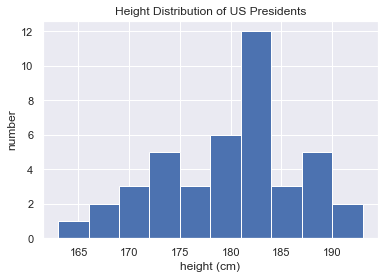

In [34]:
plt.hist(heights) # histogram of height
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');